# DESY1 Multinest Outputs

Loading the outputs from running multinest with FireCrown.

In [1]:
import pandas as pd 
import yaml
import matplotlib.pyplot as plt
import seaborn 
seaborn.set()

## Load Multinest Chain

In [2]:
analysis_id = 'a98288d866d544849e97b5720227d7cb'

In [3]:
output_path = '/global/u1/e/elp25/txpipe-reanalysis/desy1/configs/output_'+analysis_id+'/'

In [4]:
import yaml
import jinja2

In [5]:
!ls {output_path}

chain.txt	      multinestev.dat
config.yaml	      multinestlive.points
metadata.yaml	      multinestphys_live.points
multinest.txt	      multinestpost_equal_weights.dat
multinestIS.iterinfo  multinestresume.dat
multinestIS.points    multineststats.dat
multinestIS.ptprob    multinestsummary.txt


In [6]:
# TODO: change to not hardcode 96 for info length and last roews
chain = pd.read_table(output_path+'chain.txt',skiprows=[row for row in range(1,96)]+[20035,20036,20037,20038],header=0)

In [7]:
rename_cols = {}
for col in chain.columns[:-4]:
    rename_cols[col] = col.split('--')[1]
chain = chain.rename(columns = rename_cols)

In [8]:
chain.columns

Index(['omega_b', 'omega_c', 'h', 'sigma8', 'n_s', 'src0_mult_bias',
       'src1_mult_bias', 'src2_mult_bias', 'src3_mult_bias', 'src0_delta_z',
       'src1_delta_z', 'src2_delta_z', 'src3_delta_z', 'prior', 'like', 'post',
       'weight'],
      dtype='object')

## Plot Parameter Convergence

Text(0, 0.5, 'omega_b')

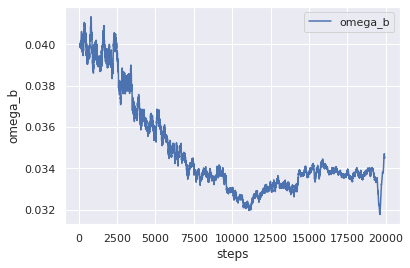

In [9]:
param = 'omega_b'
s = pd.Series(chain[param])
plt.plot(s.rolling(100).mean(),label=param)
plt.legend(loc='best')
plt.xlabel('steps')
plt.ylabel(param)

Text(0, 0.5, 'sigma8')

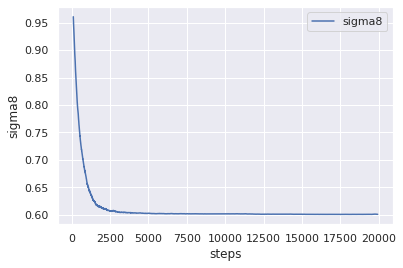

In [10]:
param = 'sigma8'
s = pd.Series(chain[param])
plt.plot(s.rolling(100).mean(),label=param)
plt.legend(loc='best')
plt.xlabel('steps')
plt.ylabel(param)

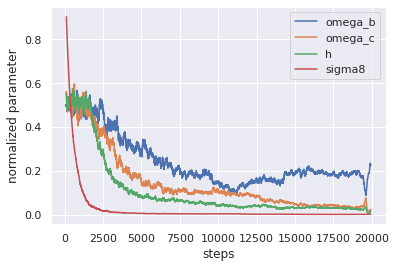

In [116]:
from sklearn import preprocessing
for param in ['omega_b','omega_c','h','sigma8']:
    s = chain[param]
    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
    s = pd.Series(min_max_scaler.fit_transform(s.values.reshape(-1,1)).flatten())
    plt.plot(s.rolling(100).mean(),label=param)
    plt.legend(loc='best')
    plt.xlabel('steps')
    plt.ylabel('normalized parameter')

In [11]:
import pandas as pd
import corner
import numpy as np

In [12]:
# can't sample in omega_m yet
chain['omega_m'] = chain['omega_c'] + 0.0485

(0.88, 0.9)

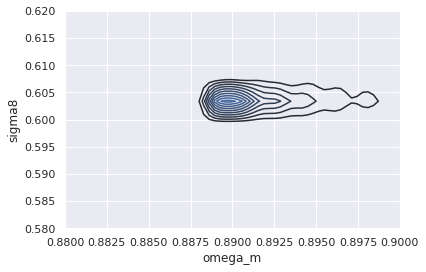

In [14]:
seaborn.kdeplot(chain['omega_m'],chain['sigma8'])
plt.ylim(0.58,0.62)
plt.xlim(0.88,0.9)

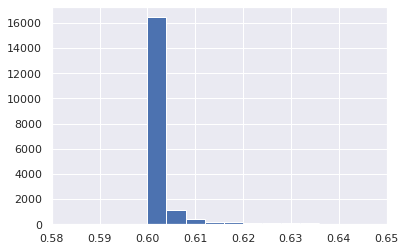

In [20]:
plt.hist(chain['sigma8'],bins=100)
plt.xlim(0.58,0.65)
plt.show()